# <노인복지센터 현황 시각화 프로젝트> &#128214;
	

## PART 2 .텍스트 마이닝 

In [4]:
# <텍스트 마이닝 >
import requests # from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import time # 코드 쉬는 시간
import re # 정규표현식 : regular expression
import numpy as np
import nltk


### 1) 웹페이지 크롤링

In [5]:
# 1. 크롤링을 위한 함수 생성
def main_crawling(query, start_date, end_date, sort_type, max_page):
 
# 여백으로 작성시 디폴트 설정
    if query == '':
        query = '데이터 분석'
    if len(start_date) != 10:
        start_date = '2019.07.28'
    if len(end_date) != 10:
        end_date = '2019.07.29'
    if sort_type not in ['0', '1', '2']:
        sort_type = '0'
#     if max_page == '':
#         max_page = 5


    # 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
    titles = []
    dates = []
    articles = []
    article_urls = []
    press_companies = []

    # 주어진 일자를 쿼리에 맞는 형태로 변경해줍니다.
    start_date = start_date.replace(".", "")
    end_date = end_date.replace(".", "")

    # 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
    current_call = 1
    last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 


    while current_call <= last_call:

        print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))

        url = "https://search.naver.com/search.naver?where=news&query=" + query \
              + "&sort=" + sort_type \
              + "&nso=so%3Ar%2Cp%3Afrom" + start_date \
              + "to" + end_date \
              + "%2Ca%3A&start=" + str(current_call)

        urls_list = []
        try: # 네이버 뉴스 검색결과 페이지 자체에 접근이 불가능할 경우 에러가 발생할 수 있습니다.
            web = requests.get(url).content
            source = BeautifulSoup(web, 'html.parser')

            for urls in source.find_all('a', {'class' : "_sp_each_url"}):
                if urls["href"].startswith("https://news.naver.com"):
                    urls_list.append(urls["href"])
        except:
            print('해당 뉴스 검색 페이지의 네이버 뉴스 링크를 모으는 중 에러가 발생했습니다. : ', url)
        
        if urls_list != []:
            for url in urls_list:
                try: # 특정 뉴스 기사글 하나를 크롤링하는 중 에러가 발생할 수 있습니다.ㄴ
                    web_news = requests.get(url).content
                    source_news = BeautifulSoup(web_news, 'html.parser')

                    title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
                    print('Processing article : {}'.format(title))

                    date = source_news.find('span', {'class' : 't11'}).get_text()

                    article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
                    article = article.replace("\n", "")
                    article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
                    article = article.replace("동영상 뉴스       ", "")
                    article = article.strip()

                    press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()

                    titles.append(title)
                    dates.append(date)
                    articles.append(article)
                    press_companies.append(press_company)
                    article_urls.append(url)
                except:
                    print('\n*** {}번부터 {}번까지의 기사글을 크롤링하는 중 문제가 발생했습니다.'.format(current_call, current_call+9))
                    print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
        else:
            pass

        time.sleep(5)
        current_call += 10
            
            
    article_df = pd.DataFrame({'Title':titles, 
                               'Date':dates, 
                               'Article':articles, 
                               'URL':article_urls, 
                               'PressCompany':press_companies})

    article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
    
    print('\n크롤링이 성공적으로 완료되었습니다!')
    print('\n크롤링 결과를 다음 파일에 저장하였습니다 : {}'.format(datetime.now().strftime('%y%m%d_%H%M')))

In [6]:
# 2. 크롤링 실행 확인
query = '경기 노인 복지 시설 부족'
start_date = '2010.01.01'
end_date = '2020.07.17'
sort_type = '0'
max_page = '3'

if start_date > end_date:
    print('\n시작 날짜는 종료 날짜보다 이후로 지정하실 수 없습니다. 다시 실행해주세요!')
elif max_page == '':
    max_page = 5
    print('\n원하시는 페이지 수가 입력되지 않았습니다. 5 페이지까지만 크롤링을 진행합니다.')
    main_crawling(query, start_date, end_date, sort_type, max_page)
else:
    max_page = int(max_page)
    main_crawling(query, start_date, end_date, sort_type, max_page)


1번째 기사글부터 크롤링을 시작합니다.
Processing article : 경기도, 시·군에 노인의료복지시설 인권지킴이 운영계획 수립 요청
Processing article : '탁구장→교회→노인복지센터'…끊어지지 않는 수도권 연쇄감염(종합)
Processing article : 고양 노인복지관 ‘부족’, 장기요양시설 ‘과다’
Processing article : [기고]더 나은 노인복지 위해 무얼 해야 할까
Processing article : 감사원 “국도·지방도 터널, 화재 필수방재시설 부족”
Processing article : 감사원 "국도·지방도 터널, 화재 필수방재시설 부족"

11번째 기사글부터 크롤링을 시작합니다.
Processing article : 경기북부 사회복지시설 부족…국비 지원 절실
Processing article : 경기북부 곳곳서 지자체 간 기피시설 갈등…'해법 없나'
Processing article : 5명 중 1명이 70세 이상인 日… 노인 복지시설은 줄도산
Processing article : [내가 만드는 복지국가] 사회복지시설 관리, 왜 이러나?
Processing article : ‘사회적 혁신’ 이끌 청년들 “고령화·저출산·노인문제 실제로 접해보니…”

21번째 기사글부터 크롤링을 시작합니다.
Processing article : "연탄도, 분유도, 화장지도 부족"…연말 불우이웃돕기 찬바람(종합)
Processing article : 경기북부 4종 복지시설 19개소 확충 필요

크롤링이 성공적으로 완료되었습니다!

크롤링 결과를 다음 파일에 저장하였습니다 : 200808_2234


In [5]:
# 3. 크롤링 데이터 가져오기
import nltk

df = pd.read_excel('result_200722_1442.xlsx', encoding='utf-8')
df.head()

,Title,Date,Article,URL,PressCompany
0,"경기도, 시·군에 노인의료복지시설 인권지킴이 운영계획 수립 요청",2020.06.25. 오전 9:07,활동비 지원·대상시설 50%까지 확대 운영 등경기도가 노인의료복지시설 입소자에 대한...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴스1
1,"경기도, 시·군에 노인의료복지시설 인권지킴이 운영 요청",2020.06.25. 오전 9:28,경기도가 노인의료복지시설 입소자에 대한 노인학대 예방 등 노인인권보호를 위해 도내 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,머니S
2,'탁구장→교회→노인복지센터'…끊어지지 않는 수도권 연쇄감염(종합),2020.06.09. 오후 3:38,"양천구 탁구장 확진자 총 51명…리치웨이는 68명""연쇄감염 고리 끊으려면 방역수칙 ...",https://news.naver.com/main/read.nhn?mode=LSD&...,edaily
3,"고양 노인복지관 ‘부족’, 장기요양시설 ‘과다’",2020.01.08. 오전 1:05,고양시청 전경. 사진제공=고양시 [고양=파이낸셜뉴스 강근주 기자] 고양 노인인구 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,financial news
4,[기고]더 나은 노인복지 위해 무얼 해야 할까,2020.03.27. 오후 6:32,[나송 전주비전대학교 사회복지경영과 겸임교수]4·15 총선을 맞아 복지국가 실현을 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,노컷뉴스


In [6]:
# 시리즈.tolist()
articles = df['Article'].tolist()

len(articles)
articles[:2]

#str 만들기
articles = ''.join(articles) # 리스트의 아이템들을 특정한 문자를 기준으로 이어 붙이기
articles[:1000]

'활동비 지원·대상시설 50%까지 확대 운영 등경기도가 노인의료복지시설 입소자에 대한 노인학대 예방 등 노인인권보호를 위해 도내 31개 시·군에 자체 노인의료복지시설 인권지킴이 운영계획을 수립하도록 요청했다./경기도청사 © 뉴스1(경기=뉴스1) 진현권 기자 = 경기도는 노인의료복지시설 입소자에 대한 노인학대 예방 등 노인인권보호를 위해 도내 31개 시·군에 자체 노인의료복지시설 인권지킴이 운영계획을 수립하도록 요청했다고 25일 밝혔다.인권지킴이는 2014년 보건복지부 노인학대방지 종합대책으로 시설 입소 노인들의 인권보호 강화와 학대 예방을 위해 도입돼 지난해 기준 경기도 전체 노인의료복지시설 1705곳의 31%가량인 530곳에서 운영했다.시군에서는 주민들 중 인권지킴이를 선발해 관련 교육을 실시한 뒤 시설을 지정해 활동하게 하고 있다. 인권지킴이는 시설장, 종사자 등에 대한 인권모니터링, 시설 설비나 서비스에서 인권취약·침해부분에 대해 시정권고요청 등을 담당한다. 그러나 일부 시군에서는 인권지킴이를 두지 않는 등 인권지킴이에 대한 인식부족을 나타내는 사례가 발생했다. 또 활동비를 지급하는 부천·포천·성남 등 3개 시군의 인권지킴이 활동이 무보수(명예직) 운영 시군에 비해 실효성이 높아 활동비 예산 지원이 필요한 것으로 나타났다. 이에 도는 31개 시·군에 Δ인권지킴이에 대한 활동비 지원 Δ대상시설 50%까지 확대 운영 Δ지역 노인보호전문기관과 연계한 인권지킴이 교육이수 등 시군 여건에 따른 자체 인권지킴이 운영계획을 수립해 적극 운영할 것을 요청했다. 도는 각 시군의 협조를 얻어 인권지킴이 운영을 독려하고 이에 대한 이행여부를 계속해 점검해 나갈 예정이다. 조태훈 도 노인복지과장은 “노인 인권지킴이 활동이 시설 노인의 인권 의식 제고와 시설환경 개선에 효과적인 것으로 파악돼 지속적인 양적·질적 확대가 필요하다”며 “더 많은 시군에서 인권지킴이를 활용할 수 있도록 지원규정 마련을 관계부처에 건의하겠다”고 말했다.jhk102010@news1.kr▶ 네이버 메인에서

In [7]:
# 4. 품사태깅
from konlpy.tag import Twitter

twitter = Twitter()
raw_pos_tagged = twitter.pos(articles, norm=True, stem=True) # POS Tagging
raw_pos_tagged # 단어 전체 보기
raw_pos_tagged[:10] # 10개까지만 보기

C:\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('활동', 'Noun'),
 ('비', 'Noun'),
 ('지원', 'Noun'),
 ('·', 'Punctuation'),
 ('대상', 'Noun'),
 ('시설', 'Noun'),
 ('50%', 'Number'),
 ('까지', 'Josa'),
 ('확대', 'Noun'),
 ('운영', 'Noun')]

In [8]:
# 제외할 단어 설정
del_list = ['따르다', '양주시', '경기', '서울', '경기도', '서울시', '사진', '지역', '증권', '지난해', '연탄','하다', '대한', '뉴스', '밝히다', '지킴', '활동', '입소', '회복', '지난', '받다','늘다', '위탁','기준' '하다', '기자', '위해', '수탁', '연합뉴스', '터널', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다', '백군기'] 

# 필요없는 품사와 제외할 단어 삭제
word_cleaned = []
for word in raw_pos_tagged: #  ('서울', 'Noun'),
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned[:10] # 10개까지만 보기

['지원', '대상', '시설', '50%', '확대', '운영', '노인', '의료', '복지', '시설']

In [9]:
# 리스트에 담긴 단어들을 대상으로 갯수를 세어,
# 단어를 key로 등장 횟수를 value로 하는 dict 만들기

from collections import Counter
result = Counter(word_cleaned)

word_dic = dict(result)
# word_dic

In [14]:
# 5. 워드 클라우드

# lambda 함수를 활용하여,
# 앞서 만든 dict를 item 단위(tuple)로 꺼내어, tuple(x)의 value(x[1])를 기준으로 하여 내림차순(reverse=True) 정렬
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic[:10]

[('시설', 128),
 ('노인', 113),
 ('복지', 97),
 ('사회', 59),
 ('운영', 48),
 ('서비스', 44),
 ('인권', 43),
 ('복지관', 39),
 ('문제', 26),
 ('없다', 26)]

In [15]:
# 내림차순 정렬된 단어 중 상위 23개 단어
# ('해결', 15),
for word, count in sorted_word_dic[:23]:
    print("{0}({1})".format(word, count), end=" ")

시설(128) 노인(113) 복지(97) 사회(59) 운영(48) 서비스(44) 인권(43) 복지관(39) 문제(26) 없다(26) 기관(22) 부족하다(21) 제공(19) 발생(17) 필요하다(17) 종합(16) 기준(16) 결과(16) 제도(16) 갈등(16) 계획(15) 지자체(15) 해결(15) 

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install wordcloud 아래 wordcloud 실행이 안될시 설치

In [28]:
# WordCloud 객체를 생성
# 아래 보이는 코드의 font_path 에 해당하는 부분이 워드클라우드의 폰트에 적용 (TIP.대체로 고딕 계열 폰트가 이쁘게 나온다)
# 만약 다른 폰트를 적용하려면, C > Windows > Fonts 폴더에 원하시는 폰트 파일(.ttf)을 넣은 후 아래 코드에서 font 이름을 수정

# word_cloud = WordCloud().generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드 만들기
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, # 실제 워드클라우드의 크기 변경(해상도 변경)
                       prefer_horizontal= 1.0, # 단어들이 가로로만 그려짐 (0~1)
                       background_color='white')

In [29]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       max_words=20, # max words
                       width=2000, height=1000, 
                       background_color='white').generate_from_frequencies(word_dic)

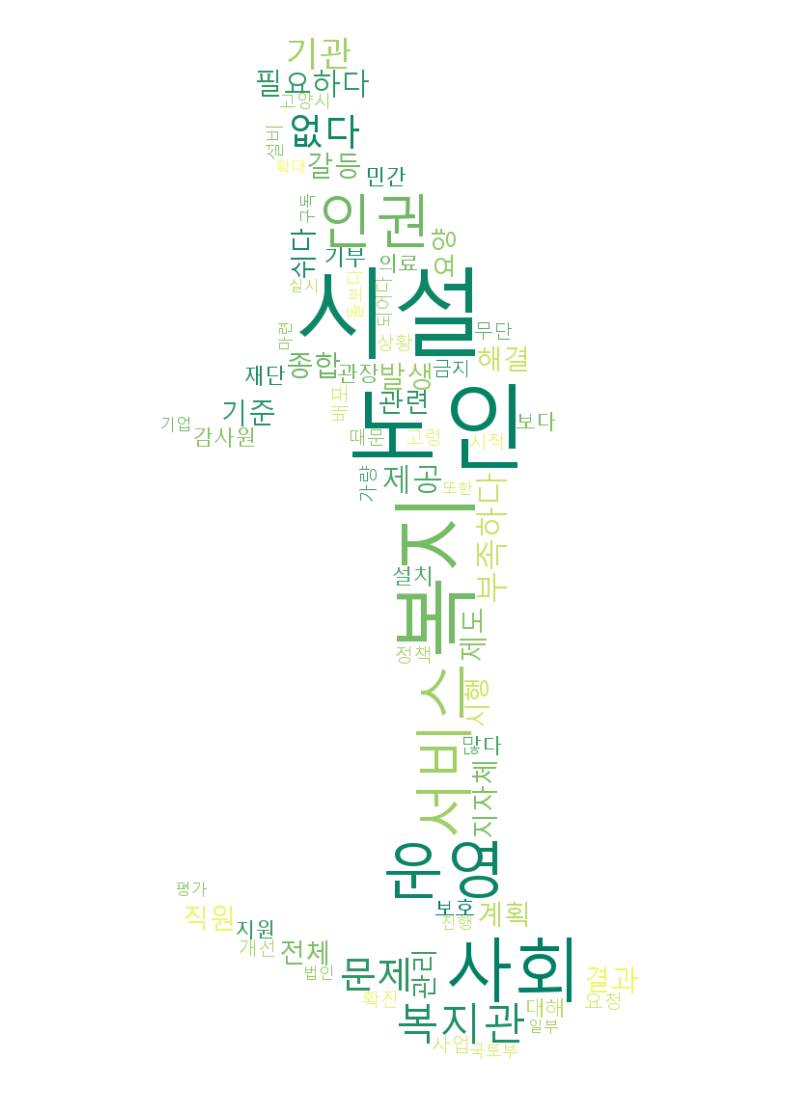

In [31]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

youtube_coloring = np.array(Image.open("images.jpg"))
image_colors = ImageColorGenerator(youtube_coloring)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       max_words=70,
                       width=2000, height=1000,  
                       mask=youtube_coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
# plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
plt.imshow(word_cloud.recolor(colormap='summer'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

-----------